In [4]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='.env', verbose=True)

True

In [5]:
import os

BIGQUERY_PROJECT_ID = os.environ.get('BIGQUERY_PROJECT_ID')
BIGQUERY_DATASET = os.environ.get('BIGQUERY_DATASET')
BIGQUERY_DATASET_REGION = os.environ.get('BIGQUERY_DATASET_REGION')
BIGQUERY_TABLE = os.environ.get('BIGQUERY_TABLE')

VERTEXAI_PROJECT_ID = os.environ.get('VERTEXAI_PROJECT_ID')
VERTEXAI_REGION = os.environ.get('VERTEXAI_REGION')

BUCKET_NAME = os.environ.get('BUCKET_NAME')
BUCKET_URI = os.environ.get('BUCKET_URI')
BUCKET_REGION = os.environ.get('BUCKET_REGION')

PREFIX = os.environ.get('PREFIX')

print("BIGQUERY_PROJECT_ID: ",BIGQUERY_PROJECT_ID)
print("BIGQUERY_DATASET: ",BIGQUERY_DATASET)
print("BIGQUERY_DATASET_REGION: ",BIGQUERY_DATASET_REGION)
print("BIGQUERY_TABLE: ",BIGQUERY_TABLE)

print("VERTEXAI_PROJECT_ID: ",VERTEXAI_PROJECT_ID)
print("VERTEXAI_REGION: ",VERTEXAI_REGION)

print("BUCKET_NAME: ",BUCKET_NAME)
print("BUCKET_URI: ",BUCKET_NAME)
print("BUCKET_REGION: ",VERTEXAI_REGION)

PIPELINE_ROOT = 'gs://{}/pipeline_root'.format(BUCKET_NAME)

BIGQUERY_PROJECT_ID:  datafusionsbox
BIGQUERY_DATASET:  dataset4ccc
BIGQUERY_DATASET_REGION:  us
BIGQUERY_TABLE:  df_for_model_ccc_with_weights
VERTEXAI_PROJECT_ID:  datafusionsbox
VERTEXAI_REGION:  us-central1
BUCKET_NAME:  gcp-demo-ccc-vertexai
BUCKET_URI:  gcp-demo-ccc-vertexai
BUCKET_REGION:  us-central1


In [6]:
from google.cloud.aiplatform import Feature, Featurestore

FEATURESTORE_ID = f"{PREFIX}_promotions"
ONLINE_STORE_FIXED_NODE_COUNT = 1

### Featurestore data model
Vertex AI Feature Store organizes data with the following 3 important hierarchical concepts:

### Featurestore -> Entity type -> Feature ###

Featurestore: The place to store your features

Entity type: Under a featurestore, an entity type describes an object to be modeled, real one or virtual one.

Feature: Under an entity type, a feature describes an attribute of the entity type


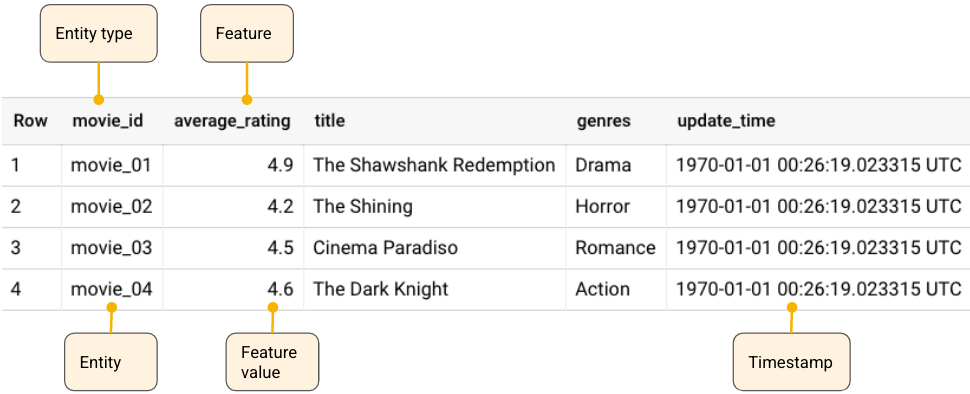

In [4]:
fs = Featurestore.create(
    featurestore_id=FEATURESTORE_ID,
    online_store_fixed_node_count=ONLINE_STORE_FIXED_NODE_COUNT,
    project=VERTEXAI_PROJECT_ID,
    location=VERTEXAI_REGION,
    sync=True,
)

Creating Featurestore
Create Featurestore backing LRO: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/operations/7867303458229977088
Featurestore created. Resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions
To use this Featurestore in another session:
featurestore = aiplatform.Featurestore('projects/339239659794/locations/us-central1/featurestores/ccc_promotions')


In [7]:
fs = Featurestore(
    featurestore_name=FEATURESTORE_ID,
    project=VERTEXAI_PROJECT_ID,
    location=VERTEXAI_REGION,
)
print(fs.gca_resource)

name: "projects/339239659794/locations/us-central1/featurestores/ccc_promotions"
create_time {
  seconds: 1676542011
  nanos: 997796000
}
update_time {
  seconds: 1676542012
  nanos: 528878000
}
etag: "AMEw9yM9CmNzjsTMnDA919iLkaYTHB67SBcLXjFDqPgX3dmjG5HEtvFRJ2YQ2JcQjAmt"
online_serving_config {
  fixed_node_count: 1
}
state: STABLE



In [51]:
stats_entity_type = fs.create_entity_type(
    entity_type_id="stats",
    description="User stats",
)

AttributeError: 'Featurestore' object has no attribute 'entity_type'

In [8]:
stats_entity_type = fs.get_entity_type(entity_type_id="stats")
stats_entity_type

resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats

In [53]:
fs.list_entity_types()

 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats]

In [9]:
table_id = f"{BIGQUERY_PROJECT_ID}.{BIGQUERY_DATASET}.{BIGQUERY_TABLE}"

In [10]:
_user_id = "synerise_client_id"
_target_column="y_if_trans"
_weight_column="weight"

_excluded_columns = [_user_id, _target_column, _weight_column]

In [11]:
from google.cloud import bigquery

client = bigquery.Client()
table = client.get_table(table_id)  # Make an API request.

print(
    "Got table '{}.{}.{}'.".format(table.project, table.dataset_id, table.table_id)
)

Got table 'datafusionsbox.dataset4ccc.df_for_model_ccc_with_weights'.


In [12]:
def map_bq_datatype_2_feature_datatype(in_field_type: str):
    ## available ['VALUE_TYPE_UNSPECIFIED', 'BOOL', 'BOOL_ARRAY', 'DOUBLE', 'DOUBLE_ARRAY', 'INT64', 'INT64_ARRAY', 'STRING', 'STRING_ARRAY', 'BYTES']
    if in_field_type == 'INTEGER': 
        return 'INT64'
    elif in_field_type == 'FLOAT':
        return 'DOUBLE'
    else: 
        return 'VALUE_TYPE_UNSPECIFIED'

In [14]:
_features = []
for schema_field in table.schema:
    if schema_field.name not in _excluded_columns:
        print(schema_field.name, map_bq_datatype_2_feature_datatype(schema_field.field_type))
        _features.append(schema_field.name)
        stats_entity_type.create_feature(
                feature_id=schema_field.name,
                value_type=map_bq_datatype_2_feature_datatype(schema_field.field_type),
                description=schema_field.name,
        )

www_visits_month_freq_1 INT64


AlreadyExists: 409 Feature `www_visits_month_freq_1` already exists for EntityType `stats` in Featurestore (339239659794, ccc_promotions).

In [15]:
_features = []
for schema_field in table.schema:
    if schema_field.name not in _excluded_columns:
        print(schema_field.name, map_bq_datatype_2_feature_datatype(schema_field.field_type))
        _features.append(schema_field.name)

www_visits_month_freq_1 INT64
www_visits_month_freq_2 INT64
www_visits_month_freq_3 INT64
www_pages_visited_month_1 INT64
www_pages_visited_month_2 INT64
www_pages_visited_month_3 INT64
www_time_onsite_avg_month_1 DOUBLE
www_time_onsite_avg_month_2 DOUBLE
www_time_onsite_avg_month_3 DOUBLE
www_trans_month_freq_1 INT64
www_trans_month_freq_2 INT64
www_trans_month_freq_3 INT64
www_basket_value_monthly_1 DOUBLE
www_basket_value_monthly_2 DOUBLE
www_basket_value_monthly_3 DOUBLE
www_coupon_add_month_1 INT64
www_coupon_add_month_2 INT64
www_coupon_add_month_3 INT64
www_device_freq_mobile INT64
www_device_freq_desktop INT64
www_umbrella_click_month_1 INT64
www_umbrella_click_month_2 INT64
www_umbrella_click_month_3 INT64
www_promo_click_month_1 INT64
www_promo_click_month_2 INT64
www_promo_click_month_3 INT64
www_gallery_click_month_1 INT64
www_gallery_click_month_2 INT64
www_gallery_click_month_3 INT64
www_channel_freq__direct_organic INT64
www_channel_freq__sem INT64
www_channel_freq__face

In [16]:
my_features = Feature.search(query="featurestore_id={}".format(FEATURESTORE_ID))
my_features

 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_1,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_2,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_3,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_1,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_2,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_3,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/featu

In [35]:
my_features = Feature.search(query="featurestore_id={} AND entity_type_id=stats".format(FEATURESTORE_ID, ))
my_features

 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_1,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_2,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_add_to_wishlist_month_freq_3,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_1,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_2,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/features/app_search_freq_month_freq_3,
 resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/featu

### Import of feature values:

You need to import feature values before you can use them for online or offline serving.
You can import feature values from:

    a/ GCS
    
    b/ BigQuery
    
    c/ DataFrame
    
    https://cloud.google.com/python/docs/reference/aiplatform/1.18.3/google.cloud.aiplatform.EntityType#google_cloud_aiplatform_EntityType_ingest_from_bq

In [17]:
from datetime import datetime

In [ ]:
## From dataframe
stats_entity_type.ingest_from_df(
    feature_ids=_features,
    feature_time=datetime.now(), ## but it cal also be "update_time"
    df_source=stats_source_df,
    entity_id_field=_user_id,
)

In [ ]:
stats_entity_type.ingest_from_gcs(
    feature_ids: _features,
    feature_time: datetime.now(),
    gcs_source_uris: Union[str, List[str]],
    gcs_source_type: str,
    feature_source_fields: Optional[Dict[str, str]] = None,
    entity_id_field: Optional[str] = None,
    disable_online_serving: Optional[bool] = None,
    worker_count: Optional[int] = None,
    request_metadata: Optional[Sequence[Tuple[str, str]]] = (),
    sync: bool = True,
    ingest_request_timeout: Optional[float] = None,
)

In [78]:
bq_source_uri=f"bq://{BIGQUERY_PROJECT_ID}.{BIGQUERY_DATASET}.{BIGQUERY_TABLE}"
bq_source_uri

'bq://datafusionsbox.dataset4ccc.df_for_model_ccc_with_weights'

In [72]:
_features

['www_visits_month_freq_1',
 'www_visits_month_freq_2',
 'www_visits_month_freq_3',
 'www_pages_visited_month_1',
 'www_pages_visited_month_2',
 'www_pages_visited_month_3',
 'www_time_onsite_avg_month_1',
 'www_time_onsite_avg_month_2',
 'www_time_onsite_avg_month_3',
 'www_trans_month_freq_1',
 'www_trans_month_freq_2',
 'www_trans_month_freq_3',
 'www_basket_value_monthly_1',
 'www_basket_value_monthly_2',
 'www_basket_value_monthly_3',
 'www_coupon_add_month_1',
 'www_coupon_add_month_2',
 'www_coupon_add_month_3',
 'www_device_freq_mobile',
 'www_device_freq_desktop',
 'www_umbrella_click_month_1',
 'www_umbrella_click_month_2',
 'www_umbrella_click_month_3',
 'www_promo_click_month_1',
 'www_promo_click_month_2',
 'www_promo_click_month_3',
 'www_gallery_click_month_1',
 'www_gallery_click_month_2',
 'www_gallery_click_month_3',
 'www_channel_freq__direct_organic',
 'www_channel_freq__sem',
 'www_channel_freq__facebook',
 'www_channel_freq__portale',
 'www_channel_freq__klub',
 '

In [92]:
stats_entity_type.ingest_from_bq(
    feature_ids = _features,
    feature_time = datetime.now(),
    bq_source_uri = bq_source_uri,
    feature_source_fields = None, ##Optional[Dict[str, str]] = None, e.g. { 'my_feature_id_1': 'my_feature_id_1_source_field', }
    entity_id_field= _user_id,
    disable_online_serving = False,
    worker_count = 1,
    request_metadata= (), ## Optional[Sequence[Tuple[str, str]]] = (),
    sync = True ##wait till done
    ##ingest_request_timeout: Optional[float] = None,
)

Importing EntityType feature values: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats
Import EntityType feature values backing LRO: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats/operations/4965014973366403072
EntityType feature values imported. Resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats


resource name: projects/339239659794/locations/us-central1/featurestores/ccc_promotions/entityTypes/stats

## Realtime import

https://github.com/googleapis/python-aiplatform/blob/e6933503d2d3a0f8a8f7ef8c178ed50a69ac2268/google/cloud/aiplatform/preview/featurestore/entity_type.py#L36

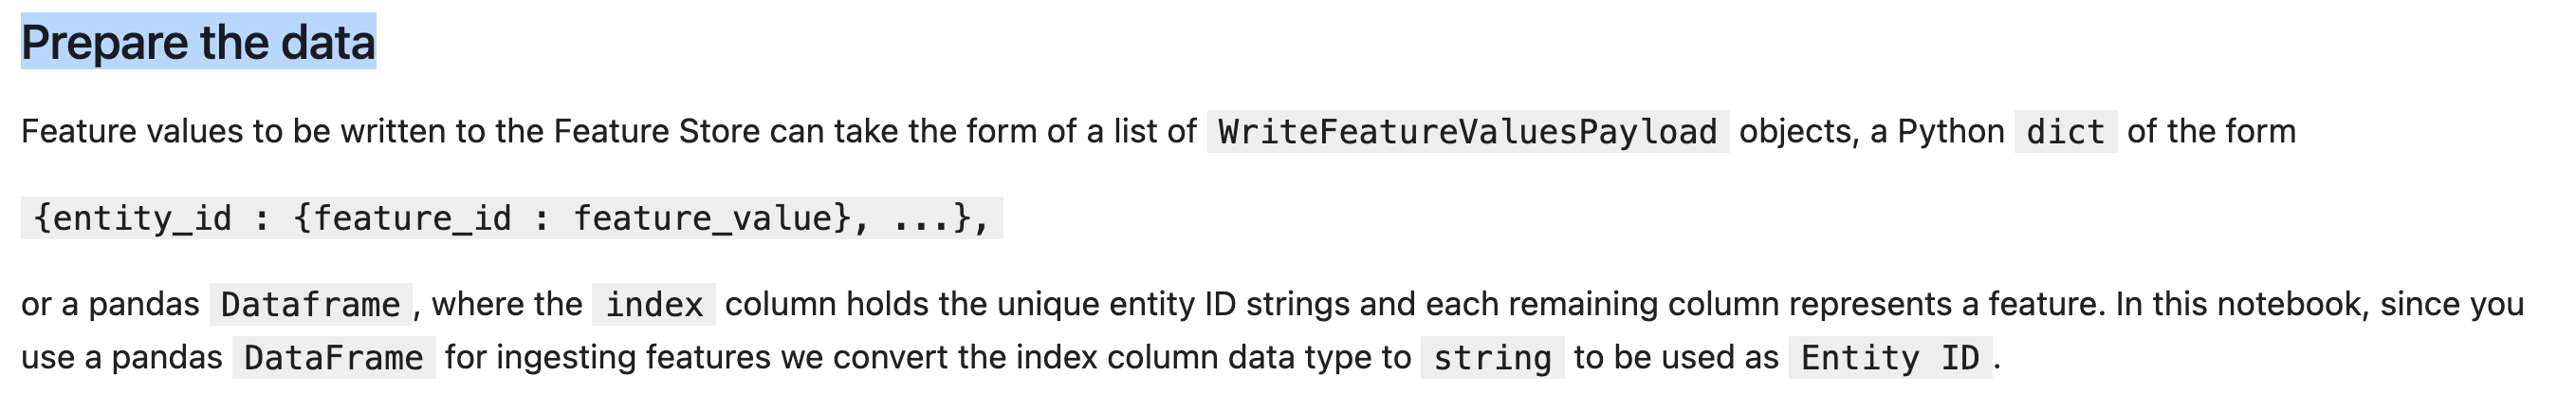

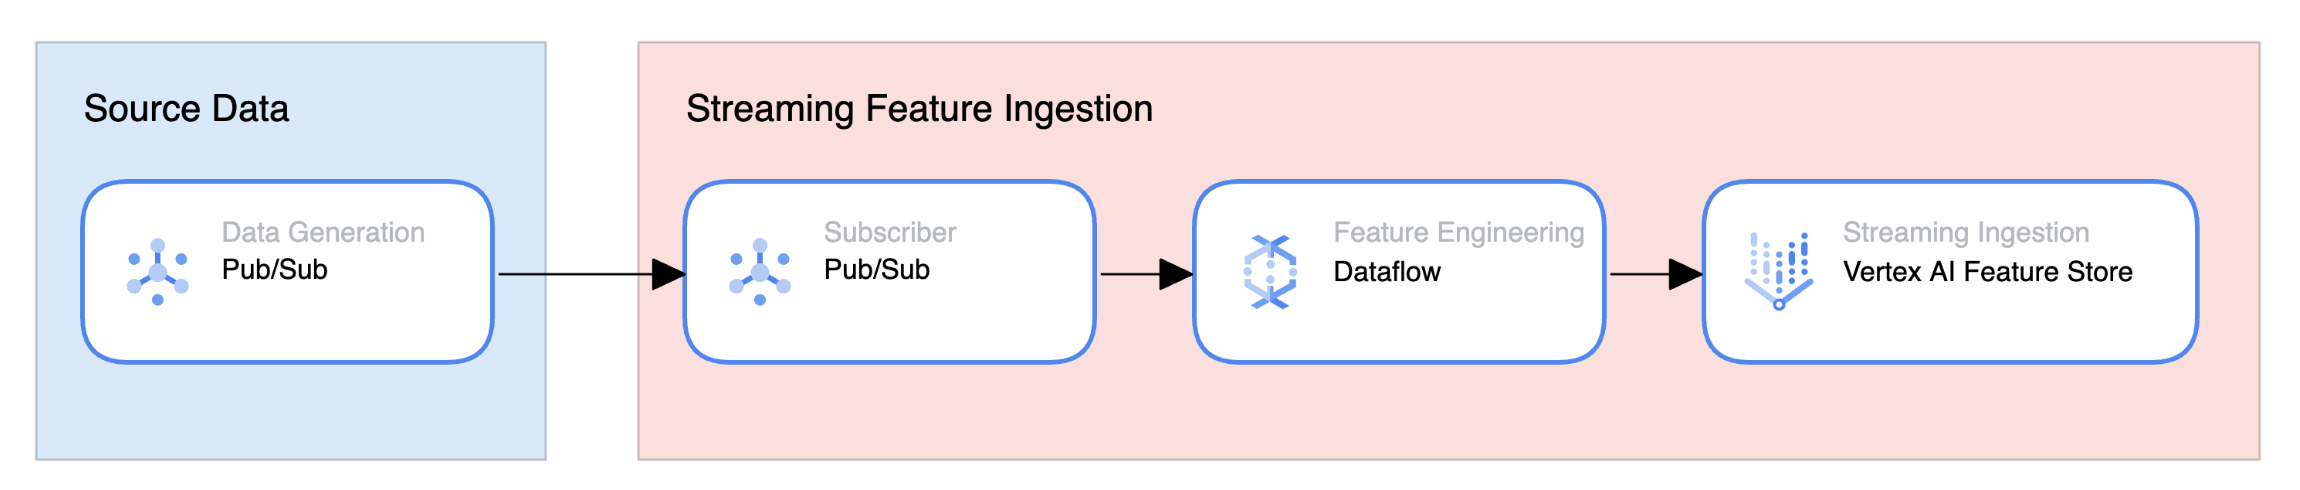

In [26]:
synerise_client_ids = ['3692184251', '2374580415', '4549777227', '1684193966', '4757806082']

### Online inference

In [90]:
user_stats_reponse = stats_entity_type.read(entity_ids=synerise_client_ids, feature_ids=_features)

In [91]:
user_stats_reponse

,entity_id,www_visits_month_freq_1,www_visits_month_freq_2,www_visits_month_freq_3,www_pages_visited_month_1,www_pages_visited_month_2,www_pages_visited_month_3,www_time_onsite_avg_month_1,www_time_onsite_avg_month_2,www_time_onsite_avg_month_3,...,app_add_to_wishlist_month_freq_1,app_add_to_wishlist_month_freq_2,app_add_to_wishlist_month_freq_3,app_search_freq_month_freq_1,app_search_freq_month_freq_2,app_search_freq_month_freq_3,crm_club_level_id,crm_store_purchase_month_freq_1,crm_store_purchase_month_freq_2,crm_store_purchase_month_freq_3
0,3129545367,0,0,0,0,0,0,0.0,0.0,0.0,...,14,9,0,6,12,8,3,0,1,0
